## Imports

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

## Get data

In [11]:
sto = pd.read_excel("Storage 1.xls")
data = pd.read_csv("AGAA_ObjectData.csv",encoding = "ISO-8859-1")

In [12]:
stoR = pd.read_excel("/Users/isaacheitmann/Desktop/Storage 1.xls")

In [13]:
dt_object = datetime.fromtimestamp(stoR.loc[3,"Painting Storage"].timestamp())

In [14]:
dt_object

datetime.datetime(2020, 9, 24, 0, 0)

In [15]:
stoR.loc[3,"Painting Storage"]

datetime.datetime(2020, 9, 24, 0, 0)

# Data Explorations: What's in here? 

In [16]:
sto

,Painting Storage,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,NaN,NaN,NaN
1,Date,Time,Humidity,Temperature
2,NaN,NaN,NaN,NaN
3,2020-09-24 00:00:00,00:00:00,44.1,71.7
4,2020-09-24 00:00:00,01:00:00,44.1,71.7
...,...,...,...,...
8772,2021-09-24 00:00:00,09:00:00,46.2,69.7
8773,2021-09-24 00:00:00,10:00:00,46,70.2
8774,2021-09-24 00:00:00,11:00:00,45.7,70.7
8775,2021-09-24 00:00:00,12:00:00,46.5,69.7


In [17]:
# cleaning the storage dataset
sto.columns = ["Date", "Time", "Humidity", "Temperature"]
sto=sto.apply(func=(lambda row: row[3:]), axis=0)

# convert date and time to integer
sto["Date"] = sto.loc[:8775,"Date"].apply(lambda dt: round(int(dt.timestamp())/86400 ) - 18529)
sto["Time"] = sto.loc[:8775,"Time"].apply(lambda dt: (int(str(dt)[:2])*3600 + int(str(dt)[3:5])*60)/3600)

In [18]:
sto

,Date,Time,Humidity,Temperature
3,0.0,0.0,44.1,71.7
4,0.0,1.0,44.1,71.7
5,0.0,2.0,44.2,71.6
6,0.0,3.0,44.2,71.6
7,0.0,4.0,44.3,71.6
...,...,...,...,...
8772,365.0,9.0,46.2,69.7
8773,365.0,10.0,46,70.2
8774,365.0,11.0,45.7,70.7
8775,365.0,12.0,46.5,69.7


In [19]:
sto.to_csv("HI SKJFBJKFGKJLHLKGHKGFDLKFGH")

In [20]:
data

,Accession Number,Artist - Sort Name,Full Title,Portfolio (Series) Title,Creation Date,Height,Width,Depth,Media & Support,Credit Line,Class Type
0,2003.23,"A, Type",Stand (face),NaN,2002-2003,24 in.,30 in.,NaN,two-channel video installation,purchased with funds from an anonymous donor a...,G: Photography
1,2007.36,"A, Type",Cheer (Slam),NaN,2006,18 1/2 in.,29 1/2 in.,NaN,chromogenic print,gift of the artists,G: Photography
2,2007.37,"A, Type",Cheer,NaN,2006,NaN,NaN,NaN,single-channel video,gift of the artists,G: Photography
3,1948.11,"Abate, Peter",Wandering,NaN,c. 1947,1 3/4 in.,5 1/8 in.,NaN,bronze,museum purchase,B: Sculpture
4,1937.37,"Abbey, Edwin Austin",Deck of a Ship,NaN,n.d.,15 in.,10 11/16 in.,NaN,"graphite, ink wash on wove paper",museum purchase,E: Work on Paper
...,...,...,...,...,...,...,...,...,...,...,...
18008,1994.11,"Zucker, Joe",Arrow,NaN,1989,41 in.,25 in.,NaN,acrylic on canvas,gift of Richard D. Segal,A: Painting
18009,1994.12,"Zucker, Joe",Joe's Painting #125,NaN,1965,73 1/2 in.,73 1/2 in.,NaN,acrylic on canvas,gift of Richard D. Segal,A: Painting
18010,1994.13,"Zucker, Joe",Portrait of Joseph H. Smith,NaN,1984,75 in.,60 in.,NaN,acrylic on canvas,gift of Richard D. Segal,B: Sculpture
18011,1994.14,"Zucker, Joe",Sprinkling Can,NaN,1980,36 in.,36 in.,NaN,acrylic on canvas,gift of Richard D. Segal,A: Painting


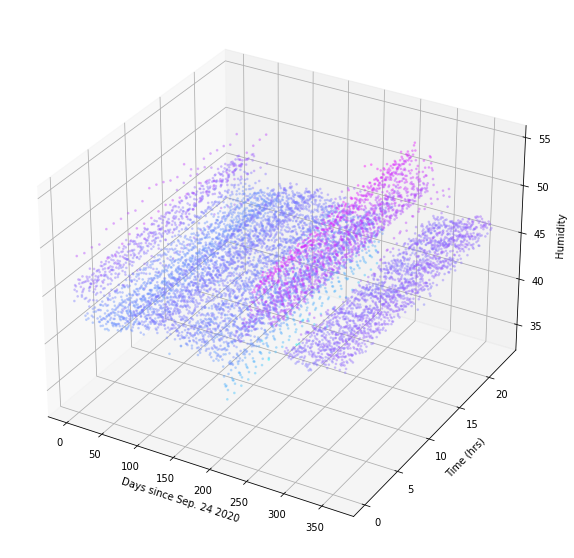

In [21]:
# Plot the correlation between time, data, humididty
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection="3d")

xpoints = sto["Date"].values
ypoints = sto["Time"].values
zpoints = sto["Humidity"].values

ax.set_xlabel(xlabel="Days since Sep. 24 2020")
ax.set_ylabel(ylabel="Time (hrs)")
ax.set_zlabel(zlabel="Humidity")

ax.scatter(xpoints, ypoints, zpoints, alpha=0.3, s=3, c=zpoints, cmap=('cool'))
plt.axes
plt.show()

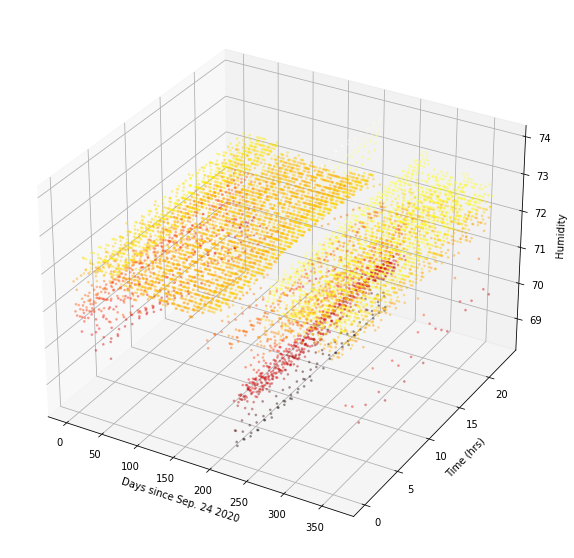

In [22]:
# Plot the correlation between time, data, humididty
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection="3d")

xpoints = sto["Date"].values
ypoints = sto["Time"].values
zpoints = sto["Temperature"].values

ax.set_xlabel(xlabel="Days since Sep. 24 2020")
ax.set_ylabel(ylabel="Time (hrs)")
ax.set_zlabel(zlabel="Humidity")

ax.scatter(xpoints, ypoints, zpoints, alpha=0.3, s=3, c=zpoints, cmap=('hot'))
plt.axes
plt.show()

#### What do the 3d scatterplots reveal? 

* There are abnormalities in temperature and humidity located around day 200 
* Time has little percievable effect on humidity and temperature

In [23]:
# useful vars
xpoints = sto["Date"].values
ypoints = sto["Time"].values
tpoints = sto["Temperature"].values
hpoints = sto["Humidity"].values

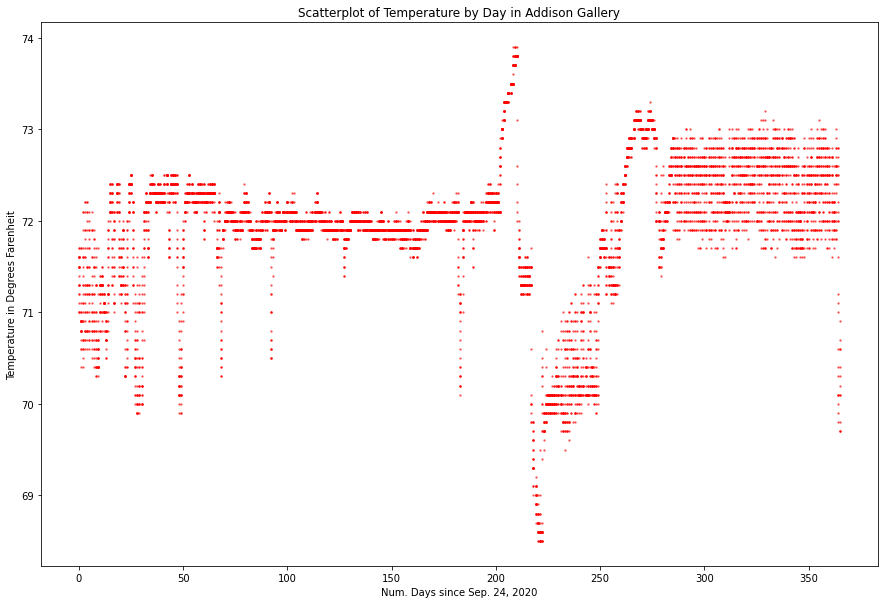

In [24]:
# make some 2d scatterplots
plt.figure(figsize = (15,10))
plt.title(label="Scatterplot of Temperature by Day in Addison Gallery")
plt.xlabel(xlabel="Num. Days since Sep. 24, 2020")
plt.ylabel(ylabel="Temperature in Degrees Farenheit")

plt.scatter(xpoints, 
            zpoints, 
            alpha=0.5, 
            s=2, 
            c="red")
plt.show()



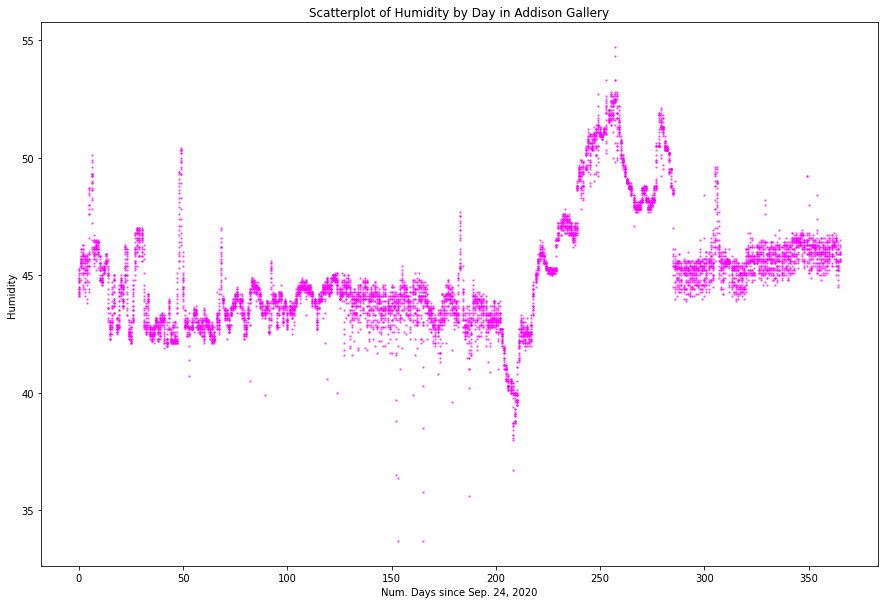

In [25]:
# make some 2d scatterplots
plt.figure(figsize = (15,10))
plt.title(label="Scatterplot of Humidity by Day in Addison Gallery")
plt.xlabel(xlabel="Num. Days since Sep. 24, 2020")
plt.ylabel(ylabel="Humidity")

plt.scatter(xpoints, 
            hpoints, 
            alpha=0.5, 
            s=2, 
            c="magenta")

plt.show()

In [26]:
def calc_since_last(data, unit):
    """
    Find the change in unit each day in data. 
    """
    to_rtn = pd.Series()
    current_row = 0
    last_row = data[unit][3]
    
    for row in data[unit]: 
        current_row = row
        to_rtn = to_rtn.append(pd.Series([current_row - last_row]))
        last_row = current_row
        
    to_rtn.index = data.index
    return to_rtn

In [27]:
timedat_toadd = list(np.linspace(0,0.99,24))  * 365  + list(np.linspace(0,0.99,14))

In [28]:
temp_differences = calc_since_last(sto, "Temperature")
hum_differences = calc_since_last(sto, "Humidity")

<ipython-input-26-42937d3251a2>:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  to_rtn = pd.Series()


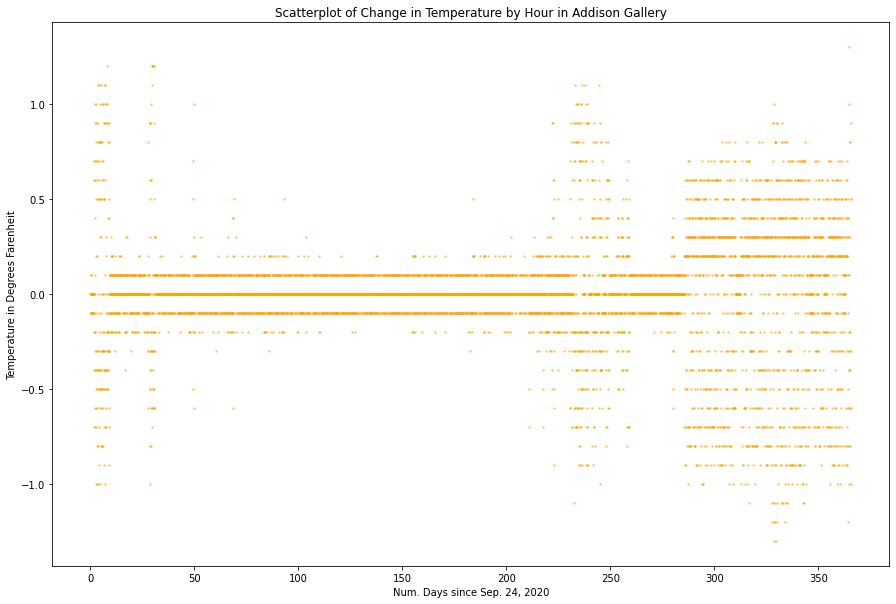

In [29]:
# make some 2d scatterplots
plt.figure(figsize = (15,10))
plt.title(label="Scatterplot of Change in Temperature by Hour in Addison Gallery")
plt.xlabel(xlabel="Num. Days since Sep. 24, 2020")
plt.ylabel(ylabel="Temperature in Degrees Farenheit")

plt.scatter(xpoints + timedat_toadd, 
            temp_differences, 
            alpha=0.5, 
            s=2, 
            c="orange")

plt.show()

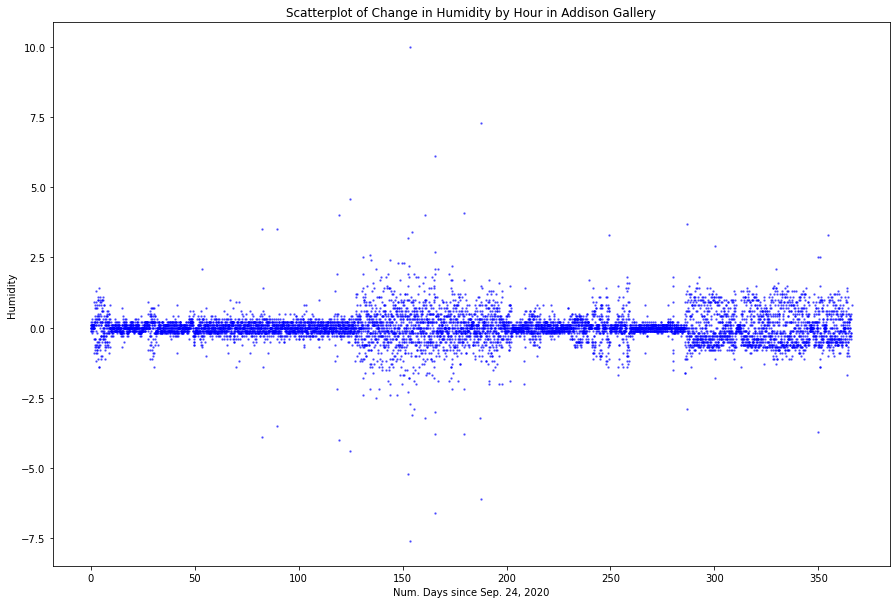

In [30]:
# make some 2d scatterplots
plt.figure(figsize = (15,10))
plt.title(label="Scatterplot of Change in Humidity by Hour in Addison Gallery")
plt.xlabel(xlabel="Num. Days since Sep. 24, 2020")
plt.ylabel(ylabel="Humidity")

plt.scatter(xpoints + timedat_toadd, 
            hum_differences, 
            alpha=0.5, 
            s=2, 
            c="blue")

plt.show()

We've found out a lot about the tempreature and humidity. To get a better picture (no pun intended) of the effects of temperature and humidiy changes on the artworks, we should examine the media of the paintings themselves. 

In [33]:
data["Media & Support"].value_counts().head(10)

gelatin silver print                                                                3570
collotype on paper                                                                   782
pencil on wove paper                                                                 462
oil on canvas                                                                        459
lithograph                                                                           442
hand-colored engraving from original drawing on wove paper on fabric support bou     435
two albumen prints mounted on studio card                                            394
etching on wove paper                                                                346
wood engraving on newsprint                                                          285
screenprint                                                                          258
Name: Media & Support, dtype: int64

### Collecting data for painting damage

##### General Information
- "Every form of deterioration is dependent on heat and moisture" (https://gawainweaver.com/images/uploads/Weaver_Guide_to_Gelatin_Silver.pdf)

1) Gelatin Silver Prints 
- https://gawainweaver.com/images/uploads/Weaver_Guide_to_Gelatin_Silver.pdf 

> Gelatin Silver Prints should not be kept over 68 degrees farenheit. They should be stored in low humidity between 30 and 50% relative humidity. 

- https://www.conservation-wiki.com/wiki/Silver_Gelatin_Printing-Out,_Silver_Gelatin_Developing-Out,_Resin_Coated_(RC),_Photo-Stat

> "An ideal temperature and humidity are 68 degrees F (20 degrees C) +/- 2 degree drift and 50% +/-5% variation over 24 hours."

2) Collotype on paper

https://www.conservation-wiki.com/wiki/Collotype

> "An ideal temperature and humidity are 68 degrees F (20 degrees C) +/- 2 degree drift and 50% +/-5% variation over 24 hours."

3) Pencil on Wove Paper

http://www.vam.ac.uk/content/articles/c/caring-for-drawings/

> "Museums aim to store their drawings in a temperature between 16 -19º with a relative humidity of 45-60 %. Again, this is not practical in the domestic setting. It is probably best to aim simply to keep the temperature stable with the relative humidity no higher than 60%." 

> 16-19c is equivalent to 60-66 degrees F

4) Oil on Canvas

https://www.nytimes.com/1996/06/09/nyregion/home-clinic-protecting-paintings-from-damage.html

> "Temperatures over 75 degrees Farenheit will cause the support to expand and the paint layers to crack and flake away. Relative humidity should be maintained around 55 percent, otherwise moisture will collect." 

5) lithograph

https://www.praecis.com/environmental-control-for-lithography

> "A typical semiconductor lithography cleanroom is ISO Class 5 - 7  with temperature variation controlled to 20 ° C ± 0.01 ° C and humidity to 45% ± 5%" 
